In [14]:
import sys
sys.path.append('../..')
import numpy as np
from pysrc.model import GaussianMixtureModel
from pysrc.pamm import PAMM
from pysrc.plots import cluster_distribution_2D, plot_contour_2D

In [15]:
descriptors = np.loadtxt('data-rings.dat')

In [16]:
grid = np.loadtxt('ref.idxs', dtype=int)[:2000] - 1

In [17]:
runner = PAMM(descriptors,
              dimension=2,
              ngrid=2000,
              fspread=0.15,
              qs=0.95,
              outputfile='fs0.15-qs0.95',
              verbose=True)

In [18]:
runner.fit(grid)

Output()

Output()

Output()

Output()

Nk-35 clusters were mergedinto other clusters.


(<Figure size 1200x1200 with 1 Axes>,
 <Axes: xlabel='Feature 0', ylabel='Feature 1'>)

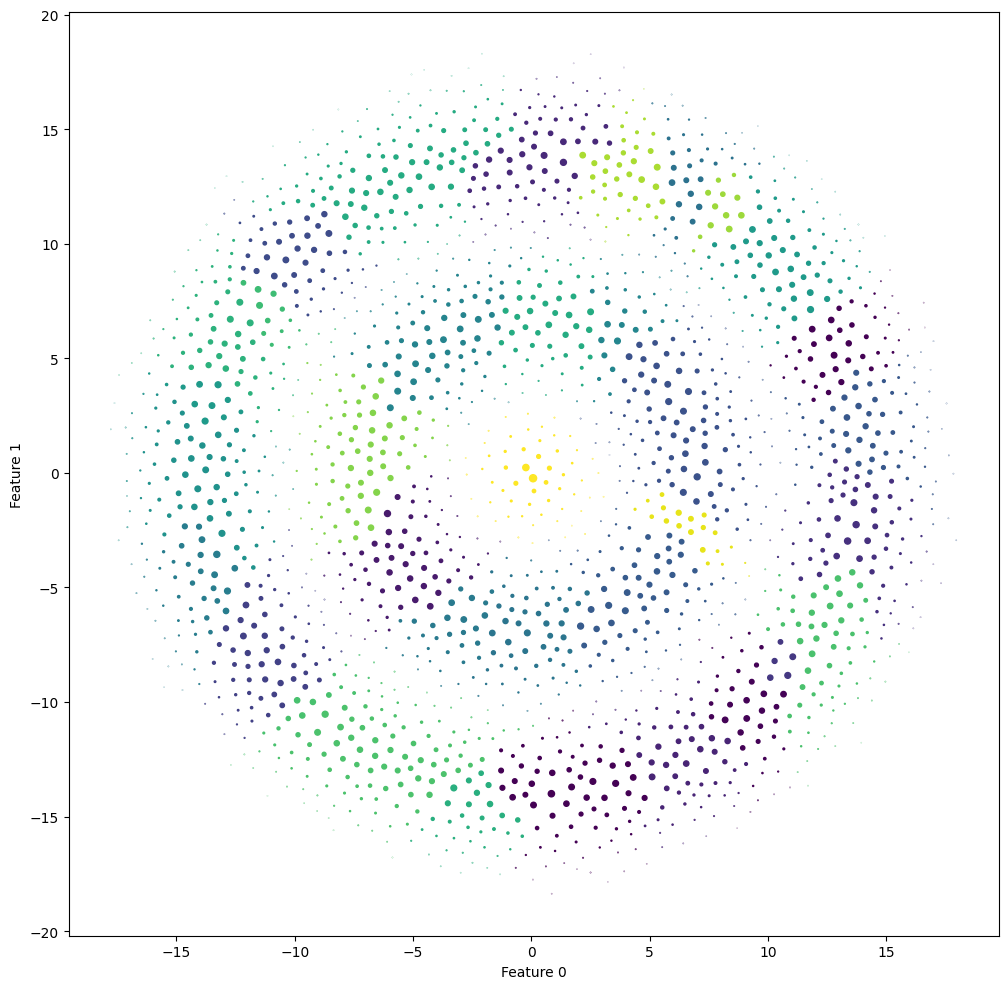

In [19]:
cluster_distribution_2D(runner)

In [20]:
gaussian_weights, gaussian_means, gaussian_cov = runner.generate_probability_model()

In [21]:
p = GaussianMixtureModel(gaussian_weights, gaussian_means, gaussian_cov)

(<Figure size 640x480 with 2 Axes>, <Axes: >)

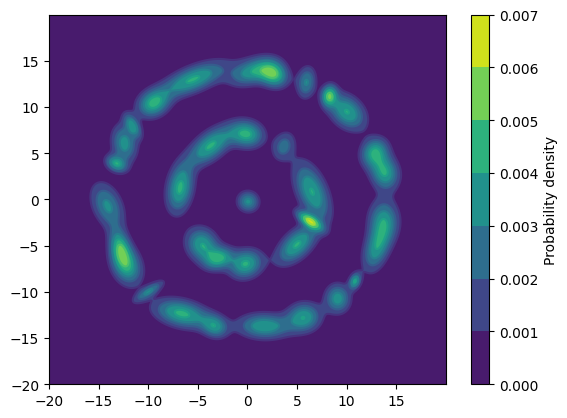

In [22]:
plot_contour_2D(p, (-20, 20), (-20, 20))

(<Figure size 640x480 with 2 Axes>, <Axes: >)

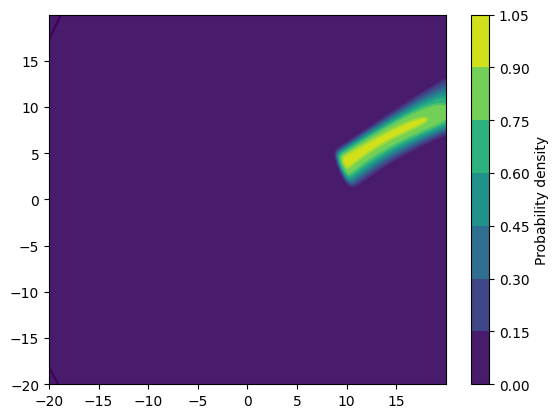

In [23]:
plot_contour_2D(p, (-20, 20), (-20, 20), gaussians=[0])